Importación de paquetes.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

Cargamos los datos necesarios.

In [2]:
medications = pd.read_csv('../data/national-health-and-nutrition-examination-survey/medications.csv', sep=',',
                          encoding='iso-8859-1')

Realizamos una limpieza de los datos de medications. Nos quedamos solo con los que sean no nulos.
Agrupamos por SEQN, ya que en medications aparece más de un registro por paciente, debido a que un paciente puede haber sido tratado por más de un motivo.

Para ello creamos un registro por paciente que tenga como variable cada una de las
enfermedades del conjunto de datos como variable binarizada. Seleccionamos solo las variables de interés. 

Convertimos el nombre de las variables de medications2 a lista para poder tenerlas identificadas y poder tratarlas después.

In [3]:
medications = medications[medications.RXDRSD1.notnull()]

df = pd.get_dummies(medications[['SEQN', 'RXDRSC1']]).groupby(['SEQN']).sum()
for i in df.columns:
    df.loc[df[i] > 1, i] = 1

df = df.reset_index()
# medications2

variablesMedications = df.columns.to_list()

Imputamos los Nan.

Se eliminan las filas y columnas que tengan todos los elementos nulos.

In [4]:
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

Imputamos de nan de variablesMedications como el valor que más se repite.

In [5]:
for v in variablesMedications:
    df[v].fillna(value=df[v].value_counts().index[0],inplace =True)

In [6]:
# CORRELACION
matrizCorrelacion = df.corr()

In [7]:
variablesRelacionadas08 = list()
for i in range(len(matrizCorrelacion)):
    var1 = matrizCorrelacion.columns[i]
    for j in range(len(matrizCorrelacion)):
        var2 = matrizCorrelacion.columns[j]
        elemento = matrizCorrelacion.iloc[i,j]
        if (i<j) & (abs(elemento)>=0.8):
            l = list()
            l.append([var1, var2])
            l.append(elemento)
            variablesRelacionadas08.append(l)
variablesRelacionadas08

[[['RXDRSC1_A44.9', 'RXDRSC1_A69.2'], 0.8163948684912153],
 [['RXDRSC1_C74', 'RXDRSC1_R20.0'], 1.0],
 [['RXDRSC1_C74', 'RXDRSC1_Z51.11'], 1.0],
 [['RXDRSC1_D25.P', 'RXDRSC1_Z94.0'], 1.0],
 [['RXDRSC1_D35.2', 'RXDRSC1_E27.40'], 1.0],
 [['RXDRSC1_I49.1', 'RXDRSC1_K91.5'], 1.0],
 [['RXDRSC1_K12.2', 'RXDRSC1_M25.52'], 1.0],
 [['RXDRSC1_R20.0', 'RXDRSC1_Z51.11'], 1.0]]

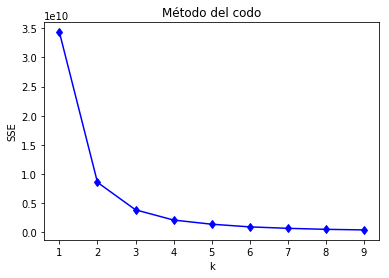

In [8]:
def regla_del_codo(k_max, datos):
    SSE = []
    for i in range(1, k_max):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(datos)
        SSE.append(kmeans.inertia_)
    plt.plot(range(1, k_max), SSE, 'bd-')
    plt.title('Método del codo')
    plt.xlabel('k')
    plt.ylabel('SSE') 
plt.show()

regla_del_codo(10, df)

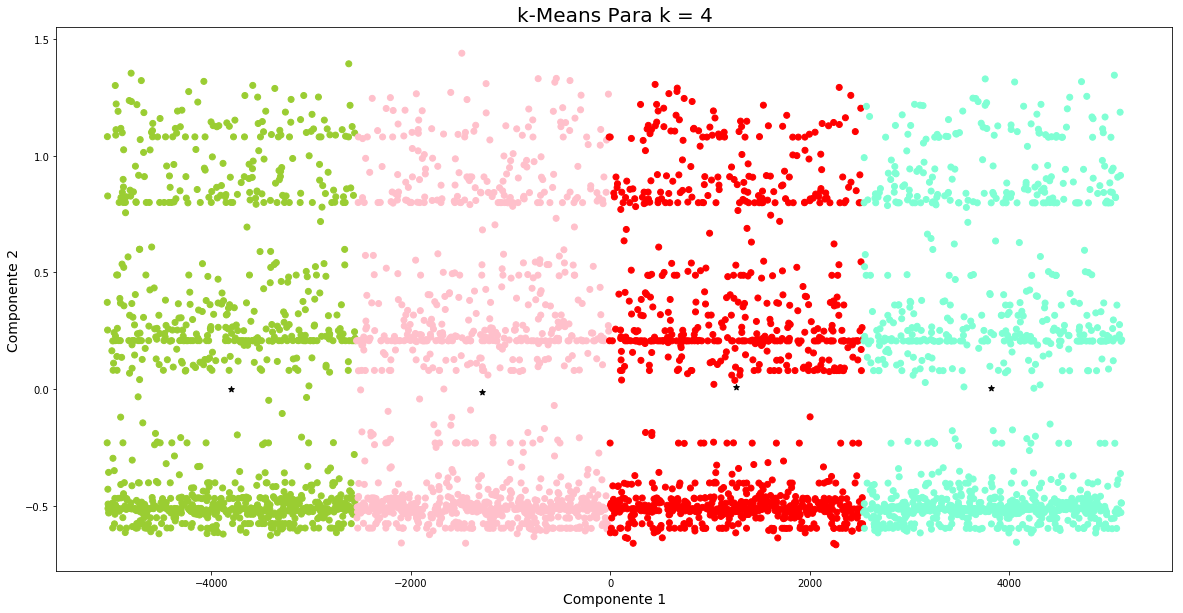

In [24]:
colores = ['r', 'yellowgreen', 'aquamarine', 'pink']

plt.figure(figsize=(20, 10)) 


colorCluster=[]
kmeans = KMeans(n_clusters=4).fit(df)
pca = PCA(n_components=2)
pca.fit(df)
projectedPCA = pca.fit(df).transform(df)
        
Lab = kmeans.labels_
for i in Lab:
    colorCluster.append(colores[i])
plt.scatter(projectedPCA[:, 0], projectedPCA[:, 1], c=colorCluster)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], marker='*', c='k')
plt.title('k-Means Para k = 4', fontsize=20)
plt.xlabel('Componente 1', fontsize=14)
plt.ylabel('Componente 2', fontsize=14)
plt.show()

Analicemos que tienen en común cada clúster. Primero creamos un dataframe con los resultados obtenidos por cluster

In [10]:
cluster1Enfermedad = list()
cluster2Enfermedad = list()
cluster3Enfermedad = list()
cluster4Enfermedad = list()

for p in range(len(Lab)):
    if Lab[p]==0:
        cluster1Enfermedad.append(df.iloc[p])
    elif Lab[p]==1:
        cluster2Enfermedad.append(df.iloc[p])
    elif Lab[p]==2:
        cluster3Enfermedad.append(df.iloc[p])
    elif Lab[p]==3:
        cluster4Enfermedad.append(df.iloc[p])

cluster1Enfermedaddf = pd.DataFrame(data=cluster1Enfermedad)
cluster2Enfermedaddf = pd.DataFrame(data=cluster2Enfermedad)
cluster3Enfermedaddf = pd.DataFrame(data=cluster3Enfermedad)
cluster4Enfermedaddf = pd.DataFrame(data=cluster4Enfermedad)

#Genero csv para poder visualizar todos los registros.
# cluster1Enfermedaddf.to_csv('cluster1Enfermedaddf.csv', index=True, header=True)
# cluster2Enfermedaddf.to_csv('cluster2Enfermedaddf.csv', index=True, header=True)
# cluster3Enfermedaddf.to_csv('cluster3Enfermedaddf.csv', index=True, header=True)
# cluster3Enfermedaddf.to_csv('cluster4Enfermedaddf.csv', index=True, header=True)

In [19]:
cluster1Enfermedaddf.head(5) 

,SEQN,RXDRSC1_A08.4,RXDRSC1_A09,RXDRSC1_A15,RXDRSC1_A15.P,RXDRSC1_A41.9,RXDRSC1_A44.9,RXDRSC1_A49.02,RXDRSC1_A49.9,RXDRSC1_A49.9P,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
0,73557,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73558,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73559,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73561,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
cluster2Enfermedaddf.head(5)

,SEQN,RXDRSC1_A08.4,RXDRSC1_A09,RXDRSC1_A15,RXDRSC1_A15.P,RXDRSC1_A41.9,RXDRSC1_A44.9,RXDRSC1_A49.02,RXDRSC1_A49.9,RXDRSC1_A49.9P,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
2010,78583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,78587,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,78591,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,78597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,78598,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
cluster3Enfermedaddf.head(5)

,SEQN,RXDRSC1_A08.4,RXDRSC1_A09,RXDRSC1_A15,RXDRSC1_A15.P,RXDRSC1_A41.9,RXDRSC1_A44.9,RXDRSC1_A49.02,RXDRSC1_A49.9,RXDRSC1_A49.9P,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
3013,81133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3014,81134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3015,81137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3016,81141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3017,81142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
cluster4Enfermedaddf.head(5)

,SEQN,RXDRSC1_A08.4,RXDRSC1_A09,RXDRSC1_A15,RXDRSC1_A15.P,RXDRSC1_A41.9,RXDRSC1_A44.9,RXDRSC1_A49.02,RXDRSC1_A49.9,RXDRSC1_A49.9P,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
992,76056,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993,76060,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,76062,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,76066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,76068,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Veamos y contemos las enfermedades por cluster.

In [11]:
def contador (clusterdf):
    clusterContador = clusterdf.astype(bool).sum(axis=0).sort_values(ascending=False)
    clusterContador = clusterContador[clusterContador!=0]
    return clusterContador

In [12]:
cluster1Contador = contador(cluster1Enfermedaddf)
cluster2Contador = contador(cluster2Enfermedaddf)
cluster3Contador = contador(cluster3Enfermedaddf)
cluster4Contador = contador(cluster4Enfermedaddf)

In [15]:
cluster1Contador.head(5)

SEQN             992
RXDRSC1_I10      392
RXDRSC1_E78.0    267
RXDRSC1_E11      153
RXDRSC1_F32.9    121
dtype: int64

In [16]:
cluster2Contador.head(5)

SEQN             1003
RXDRSC1_I10       407
RXDRSC1_E78.0     285
RXDRSC1_E11       134
RXDRSC1_K21       112
dtype: int64

In [17]:
cluster3Contador.head(5)

SEQN             1003
RXDRSC1_I10       400
RXDRSC1_E78.0     283
RXDRSC1_E11       139
RXDRSC1_K21        97
dtype: int64

In [18]:
cluster4Contador.head(5)

SEQN             1018
RXDRSC1_I10       396
RXDRSC1_E78.0     266
RXDRSC1_E11       149
RXDRSC1_K21       123
dtype: int64

In [13]:
for vr in variablesRelacionadas08:
    enfermedadCodigo1 = vr[0][0].split('_')[1]
    enfermedadDescripcion1 = list(medications[medications['RXDRSC1']==enfermedadCodigo1]['RXDRSD1'])[0]
    enfermedadCodigo2 = vr[0][1].split('_')[1]
    enfermedadDescripcion2 = list(medications[medications['RXDRSC1']==enfermedadCodigo2]['RXDRSD1'])[0]
    
    for r in range(2):
        if r == 0:
            enfermedadDescripcion = enfermedadDescripcion1
        
        else:
            enfermedadDescripcion = enfermedadDescripcion2
            

        if vr[0][r] in cluster1Contador:
            print('"{}" está en el cluster1, {} vez. Con SEQN {}'.format(enfermedadDescripcion, cluster1Contador[vr[0][r]],
                                                                         list(cluster1Enfermedaddf[cluster1Enfermedaddf[vr[0][r]]==1]['SEQN'])[0]))
        if vr[0][r] in cluster2Contador:
            print('"{}" está en el cluster2, {} vez. Con SEQN {}'.format(enfermedadDescripcion, cluster2Contador[vr[0][r]],
                                                                         list(cluster2Enfermedaddf[cluster2Enfermedaddf[vr[0][r]]==1]['SEQN'])[0]))
        if vr[0][r] in cluster3Contador:
            print('"{}" está en el cluster3, {} vez. Con SEQN {}'.format(enfermedadDescripcion, cluster3Contador[vr[0][r]],
                                                                         list(cluster3Enfermedaddf[cluster3Enfermedaddf[vr[0][r]]==1]['SEQN'])[0]))
        if vr[0][r] in cluster4Contador:
            print('"{}" está en el cluster4, {} vez. Con SEQN {}'.format(enfermedadDescripcion, cluster4Contador[vr[0][r]],
      
                                                                         list(cluster4Enfermedaddf[cluster4Enfermedaddf[vr[0][r]]==1]['SEQN'])[0]))
    print("""
    """)
    
    print('La correlación entre "{}" y "{}" es: {}'.format(enfermedadDescripcion1, enfermedadDescripcion2, vr[1])) 
    
    
    print("""
    
    
    """)

"Bartonellosis, unspecified" está en el cluster3, 1 vez. Con SEQN 82955
"Bartonellosis, unspecified" está en el cluster4, 1 vez. Con SEQN 78181
"Lyme disease" está en el cluster2, 1 vez. Con SEQN 79201
"Lyme disease" está en el cluster3, 1 vez. Con SEQN 82955
"Lyme disease" está en el cluster4, 1 vez. Con SEQN 78181

    
La correlación entre "Bartonellosis, unspecified" y "Lyme disease" es: 0.8163948684912153

    
    
    
"Malignant neoplasm of adrenal gland" está en el cluster2, 1 vez. Con SEQN 78813
"Anesthesia of skin" está en el cluster2, 1 vez. Con SEQN 78813

    
La correlación entre "Malignant neoplasm of adrenal gland" y "Anesthesia of skin" es: 1.0

    
    
    
"Malignant neoplasm of adrenal gland" está en el cluster2, 1 vez. Con SEQN 78813
"Encounter for antineoplastic chemotherapy" está en el cluster2, 1 vez. Con SEQN 78813

    
La correlación entre "Malignant neoplasm of adrenal gland" y "Encounter for antineoplastic chemotherapy" es: 1.0

    
    
    
"Prevent u

In [26]:
cluster1Enfermedaddf.describe()

,SEQN,RXDRSC1_A08.4,RXDRSC1_A09,RXDRSC1_A15,RXDRSC1_A15.P,RXDRSC1_A41.9,RXDRSC1_A44.9,RXDRSC1_A49.02,RXDRSC1_A49.9,RXDRSC1_A49.9P,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
count,992.000000,992.0,992.000000,992.0,992.000000,992.0,992.0,992.0,992.000000,992.000000,...,992.0,992.000000,992.0,992.0,992.000000,992.0,992.000000,992.0,992.000000,992.000000
mean,74796.155242,0.0,0.002016,0.0,0.002016,0.0,0.0,0.0,0.003024,0.004032,...,0.0,0.001008,0.0,0.0,0.002016,0.0,0.001008,0.0,0.001008,0.001008
std,727.940688,0.0,0.044879,0.0,0.044879,0.0,0.0,0.0,0.054937,0.063404,...,0.0,0.031750,0.0,0.0,0.044879,0.0,0.031750,0.0,0.031750,0.031750
min,73557.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,74157.500000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,74808.500000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,75405.250000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,76049.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,...,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000
